In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
local_code_folder='/home/nklm/Px_heatperiods/annual_heat_periods/'
local_perm_folder='/perm/nklm/Px_heatperiods/lproc/'
local_scrh_folder='/scratch/nklm/Px_heatperiods/'
diri=f'{local_scrh_folder}/preproc/'
diro=f'{local_perm_folder}/preproc/annual_heat_periods_txtfiles/'

In [3]:
ERA5_vals = [28.068115, 29.764832, 28.524139, 28.514038, 33.989044, 30.726807 ]
ERA5_y = [0, 0, 0, 0, 0, 0]

Gemiddelde van PD is: 30.413313369750977
Gemiddelde van 2K is: 33.25596096038819


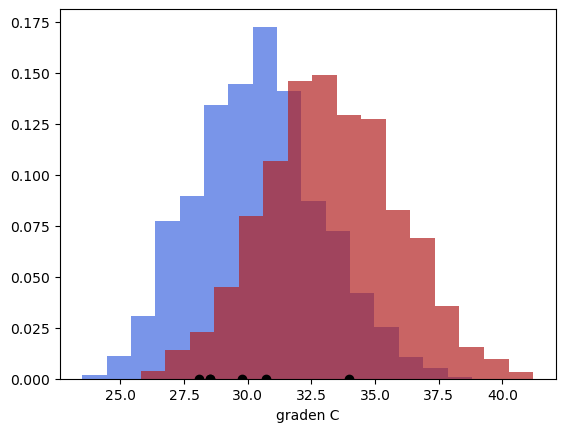

In [13]:
country='NL'
lat = 52.37403
lon = 4.88969

vars = ['tas'] 


for var in vars:
    if var == 'pr':
        scale_factor = 60*60*24
        subtract = 0
        units = 'mm/dag'
    elif var == 'tas':
        scale_factor = 1
        subtract = 273.15
        units = 'graden C'            
    else: 
        scale_factor = 1
        subtract = 0
    
    for timeslice in ['PD', '2K']:
        if timeslice == 'PD':
            letter = 'h'
            color = 'royalblue'
        elif timeslice == '2K':
            letter = 's'
            color = 'firebrick'

        diri_ext = f'/scratch/nklm/LENTIS/{timeslice}/3hr/{var}/NL/' 

        
        ensemble_maxima = []

        for i in range(1,16+1):
            for j in range(0,9+1):
                ens_member=f'{letter}{i:02}{j}'


                fili=(f'NL_{var}_{ens_member}.nc')
                ds=xr.open_dataset(diri_ext+fili) #.sel(lat=lat,lon=lon, method='nearest')

                df = ds.to_dataframe()
                ds.close()

                df.reset_index(inplace=True)
                df['year'] = df.time.map(lambda x: x.year)
                df_max = df.loc[df.groupby(["year"])[var].idxmax()]

                member_maxima = df_max[var] * scale_factor - subtract
                ensemble_maxima.append(member_maxima)

        flat_list = [item for sublist in ensemble_maxima for item in sublist]
        print(f'Gemiddelde van {timeslice} is: {np.mean(flat_list)}')

        plt.hist(np.round(flat_list,1), color=color,  alpha=0.7,density=True, bins=16, label=timeslice)

    plt.scatter(ERA5_vals,ERA5_y,color='k')
    plt.xlabel(units)
    # plt.legend()
    # plt.show()
    plt.savefig(f'figuren/{var}_NL.png', dpi=200, bbox_inches='tight')


In [12]:
33.25596096038819 - 30.413313369750977

2.8426475906372097